<a href="https://colab.research.google.com/github/Ahmed-A-Mohamed/MachineLearning-DeepLearning/blob/master/HyperparamterTunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [*Neural Networks Summary: All hyperparameters*](https://www.youtube.com/watch?v=h291CuASDno&list=PLcWfeUsAys2nPgh-gYRlexc6xvscdvHqX&index=11) (**AssemblyAI Youtube channel**)

# **Hyperparamter Tuning using Grid Search**

# **1. Batch size and Epochs**

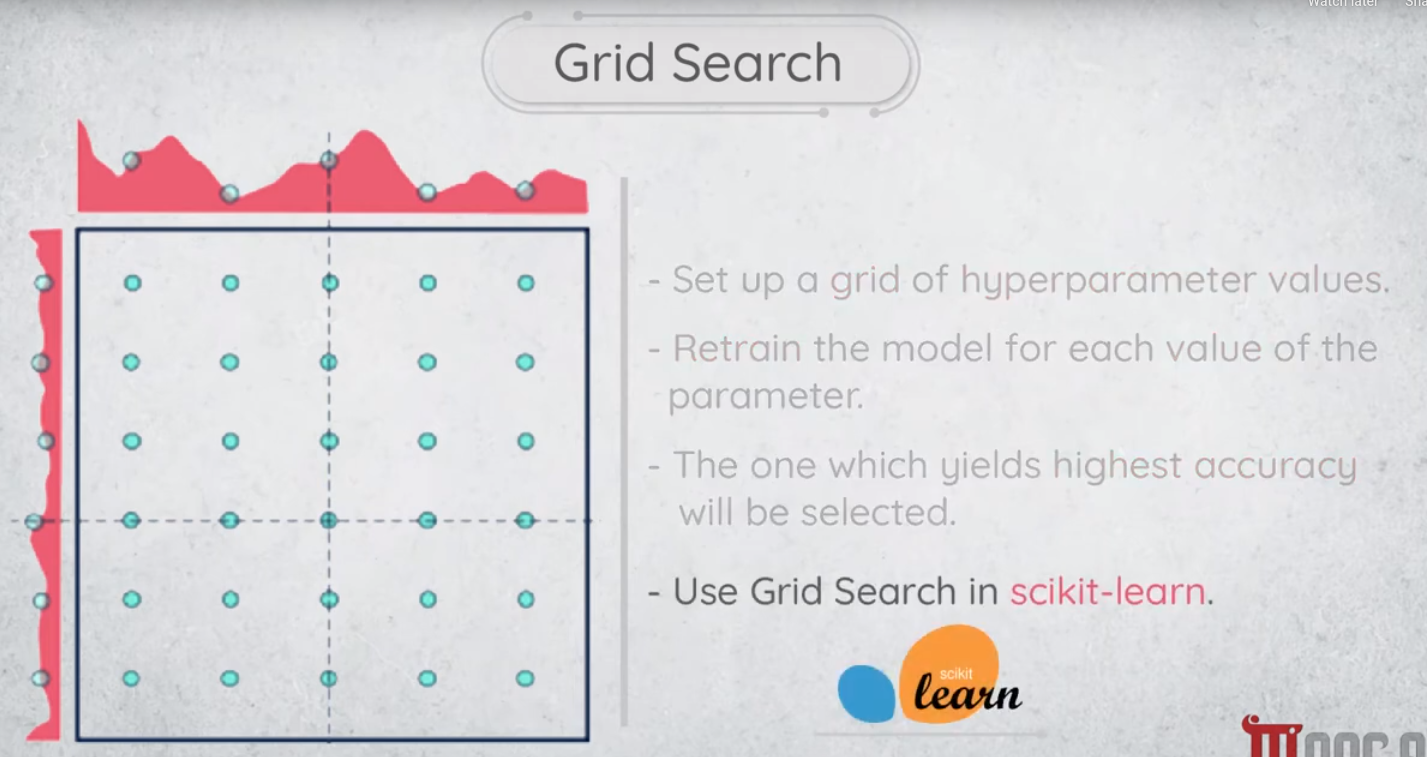

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam',metrices=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100] # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can change the size of batch
epochs = [10, 50, 100] # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can change the numebr of epoch
param_grid = dict(batch_size=batch_size, epochs=epochs) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# **2. Tuning Optimization algorithms**



> The main porpose of **optimizer** is reducing the loss function (helping models to make accurate predictions)



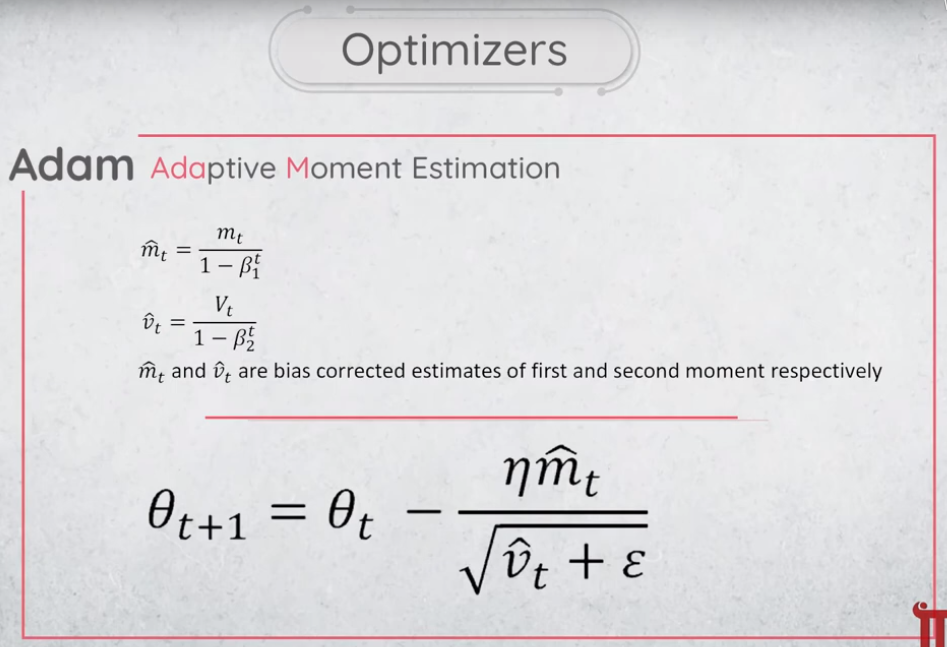



> **Adagrad** works well if the input has many missing values



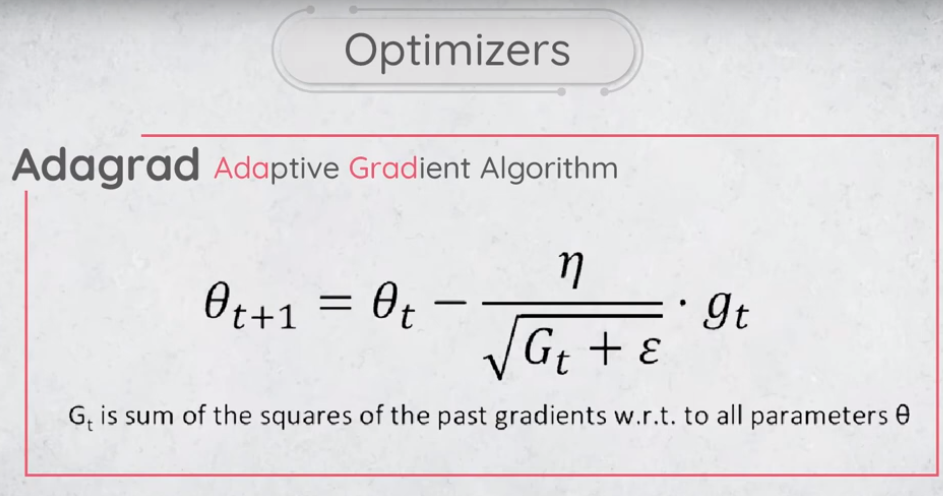

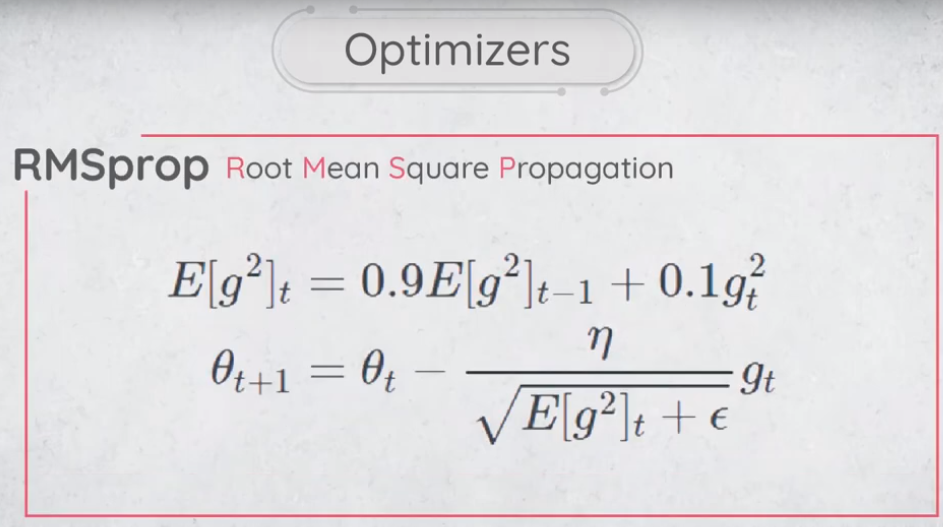

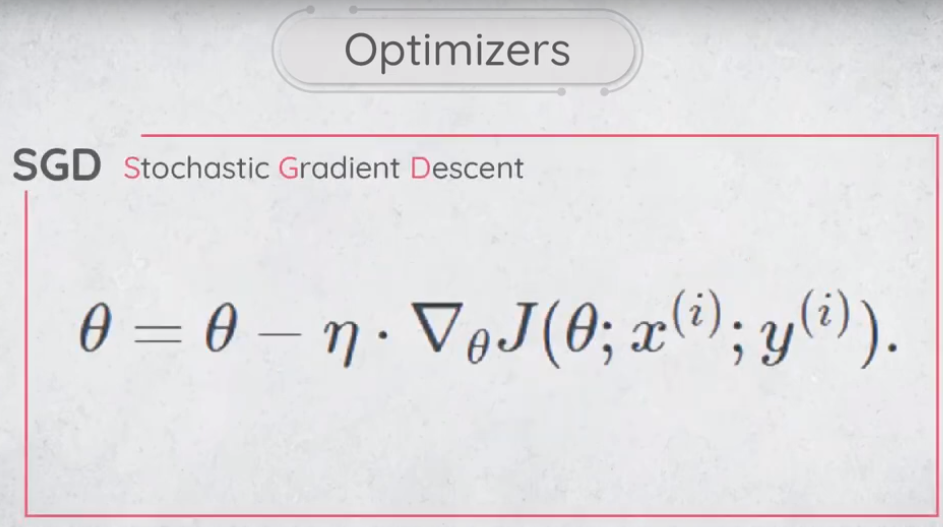

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'): # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can try many optimizer reached to the most reiable one
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer,metrices=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # epochs=100, batch_size=10 => the best result from previous step

# define the grid search parameters
optimzer = ['SGD', 'RMSprop','Adagrad','Adadelta','Adam','Adamax','Nadam']
param_grid = dict(optimizer=optimizer) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# **3. Tuning Activation Function**

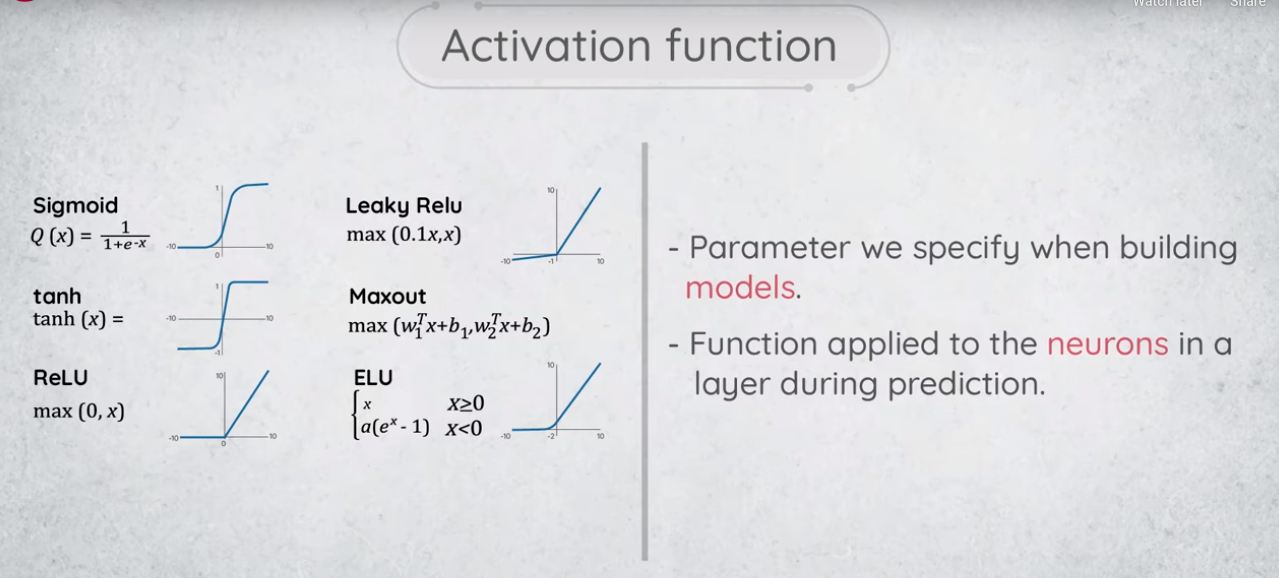

Screenshot from 2024-02-27 21-50-47.png

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(activation='relu'): # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can try many activation function reached to the most reiable one
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, kernel_initializer='uniform' , activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='Adam',metrices=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # epochs=100, batch_size=10 => the best result from previous step

# define the grid search parameters
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(activation=activation) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# **4. Tunning drop-out Regularization layer**

# [*Regularization in a Neural Network | Dealing with overfitting*](https://www.youtube.com/watch?v=EehRcPo1M-Q&list=PLcWfeUsAys2nPgh-gYRlexc6xvscdvHqX&index=4) **(AssemblyAI Youtube channel)**

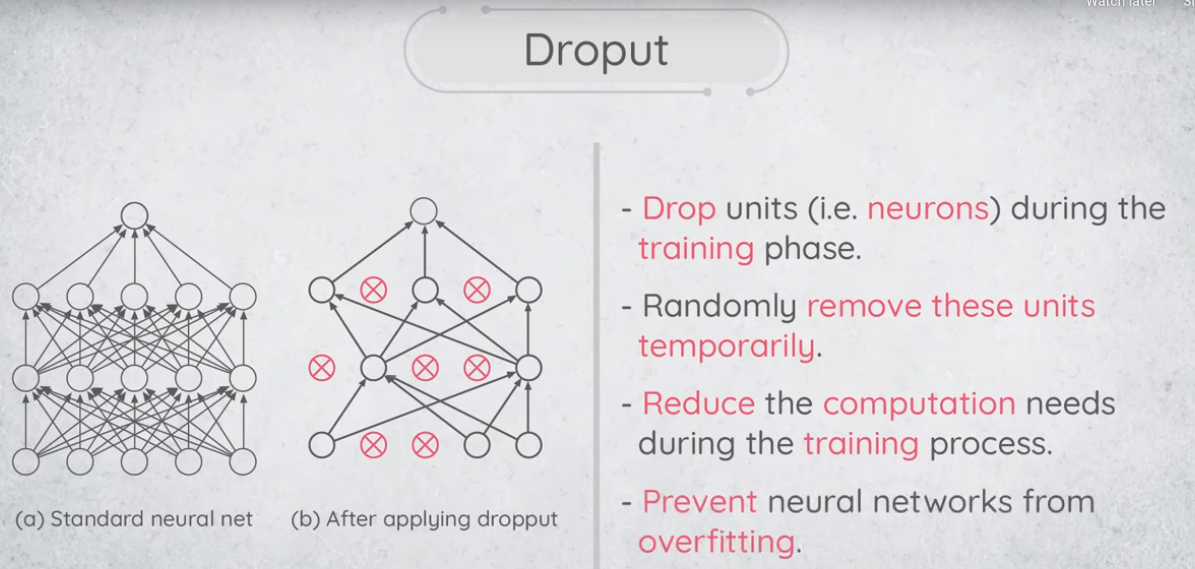

Screenshot from 2024-02-27 22-44-57.png

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0): # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can try many dropout rate reached to the most reiable one
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, kernel_initializer='uniform' , activation='linear', kernel_constraint=maxnorm(weight_constraint))) # <<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>> activation='linear' => because it's the best one in the previous step
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='Adam',metrices=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # epochs=100, batch_size=10 => the best result from previous step

# define the grid search parameters
weight_constraint = [1,2,3,4,5]
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# **5. Tuning Number of Neurons**

Screenshot from 2024-02-28 07-46-53.png

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(neurons=1): # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> you can try many neurons reached to the most reiable one
  # create model
  model = Sequential()
  model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform' , activation='Softplus', kernel_constraint=maxnorm(4))) # <<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>> activation='Softplus' => because it's the best one in the previous step instead of "linear" because updated dataset & kernel_constraint=maxnorm(4) => from precvious step
  model.add(Dropout(0.2)) # <<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>> Dropout(0.2) => the best result from previous step
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='Adam',metrices=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # epochs=100, batch_size=10 => the best result from previous step

# define the grid search parameters
neurons = [1,5,10,15,20,25,30]
param_grid = dict(neurons=neurons) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# **6. Tuning learning rate and momentum** (*This step used in case of choosing SVG as optimizer from previous steps*)

Screenshot from 2024-02-28 07-58-53.png

Screenshot from 2024-02-28 08-00-10.png

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0): # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu')) # <<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>> activation='relu'
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  optimizer = SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss='binary_crossentropy', optimizer=optimizer,metrices=['accuracy']) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>> this step for SGD optimizer only
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Deep learning/iTi Deep Learning/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8] # 80% data
Y = dataset[:,8] # 20% data

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # epochs=100, batch_size=10 => the best result from previous step

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum) # <<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))